https://www.computerworld.com/article/3038270/create-maps-in-r-in-10-fairly-easy-steps.html


Each county has a FIPS code as shown in 
https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm

This tutorial is part of Computerworld's How to Make a Map with R in 10 (fairly) Easy Steps https://www.computerworld.com/article/3038270/data-analytics/create-maps-in-r-in-10-fairly-easy-steps.html
 by Sharon Machlis sharon_machlis@idg.com

In [1]:

# Run any of the install.packages() commands below for packages that are not yet on your system
#  install.packages("shiny") 
#  install.packages("urltools")
#  install.packages("tmap")
#  install.packages("tmaptools")
#  install.packages("leaflet")
#  install.packages("leaflet.extras")
#  install.packages("rio")
#  install.packages("scales")
#  install.packages("htmlwidgets")
#  install.packages("sf")
#  install.packages("dplyr")

In [2]:
# Set various values needed, including names of files and FIPS codes for New Hampshire and South Carolina
nhdatafilecsv <- "./data/NHD2016.csv"
scdatafile <- "./data/SCGOP2016.csv"

usshapefile <- "./Maps/cb_2014_us_county_5m.shp"
scfipscode <- "45"
nhfipscode <- "33"
# Load the tmap, tmaptools, and leaflet packages into your working session: 
library("tmap")
library("tmaptools")
library("leaflet")
library("sf")
library("leaflet.extras")
library("dplyr")

#nhdata <- rio::import(nhdatafile)

Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:

# Read in the 2016 Presidential Primary - Democratic President New Hampshire election results file:
nhdata <- rio::import(nhdatafilecsv)

# Eliminate columns for minor candidates and just use County, Clinton and Sanders columns:
nhdata <- nhdata[,c("County", "Clinton", "Sanders")]

# Add columns for percents and margins:
nhdata$SandersMarginVotes <- nhdata$Sanders - nhdata$Clinton
nhdata$SandersPct <- (nhdata$Sanders) / (nhdata$Sanders + nhdata$Clinton) # Will use formatting later to multiply by a hundred
nhdata$ClintonPct <- (nhdata$Clinton) / (nhdata$Sanders + nhdata$Clinton)
nhdata$SandersMarginPctgPoints <- nhdata$SandersPct - nhdata$ClintonPct
head(nhdata)

,County,Clinton,Sanders,SandersMarginVotes,SandersPct,ClintonPct,SandersMarginPctgPoints
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Belknap,3495,6005,2510,0.6321053,0.3678947,0.2642105
2,Carroll,3230,5638,2408,0.6357691,0.3642309,0.2715381
3,Cheshire,5132,12441,7309,0.7079611,0.2920389,0.4159222
4,Coos,2013,3639,1626,0.6438429,0.3561571,0.2876858
5,Grafton,6918,14245,7327,0.6731087,0.3268913,0.3462175
6,Hillsborough,28147,39245,11098,0.5823392,0.4176608,0.1646783


Warning message:
“This function is deprecated and has been migrated to github.com/mtennekes/oldtmaptools”
Warning message in readOGR(dir, base, verbose = FALSE, ...):
“Z-dimension discarded”


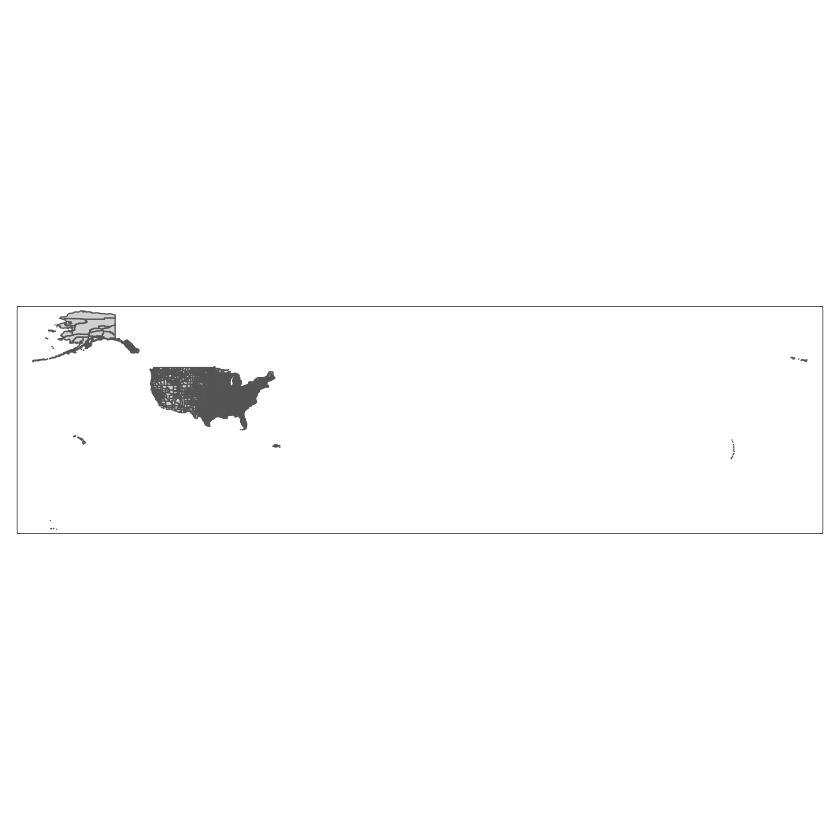

In [4]:
# Read in the shapefile for US states and counties:
usgeo <- read_shape(file=usshapefile, as.sf = TRUE)

# Do a quick plot of the shapefile and check its structure:
qtm(usgeo)

You can look at the contents of usgeo, and at specific columns.

In [5]:
str(usgeo)

usgeo$STATEFP
usgeo$NAME

Classes ‘sf’ and 'data.frame':	3233 obs. of  10 variables:
 $ STATEFP : Factor w/ 56 levels "01","02","04",..: 1 11 16 37 39 37 28 26 29 10 ...
 $ COUNTYFP: Factor w/ 328 levels "001","003","005",..: 42 76 74 78 78 38 22 137 291 35 ...
 $ COUNTYNS: Factor w/ 3233 levels "00023901","00025441",..: 120 430 738 1911 2024 1880 1399 1373 1490 298 ...
 $ AFFGEOID: Factor w/ 3233 levels "0500000US01001",..: 30 442 844 2189 2302 2158 1669 1589 1764 344 ...
 $ GEOID   : Factor w/ 3233 levels "01001","01003",..: 30 442 844 2189 2302 2158 1669 1589 1764 344 ...
 $ NAME    : Factor w/ 1921 levels "A\xf1asco","Abbeville",..: 620 592 945 1291 1665 692 320 1683 284 747 ...
 $ LSAD    : Factor w/ 11 levels "00","03","04",..: 5 5 5 5 5 5 5 5 1 5 ...
 $ ALAND   : Factor w/ 3233 levels "1000508842","1001064387",..: 1199 5 2047 452 1721 2091 1880 1194 2397 1215 ...
 $ AWATER  : Factor w/ 3233 levels "0","10017640",..: 1626 414 1940 1718 1118 2724 2916 2228 1613 497 ...
 $ geometry:sfc_MULTIPOLYGON of lengt

[1] 01 13 19 40 42 40 31 29 32 12 05 48 49 31 42 35 40 40 19 19 20 28 29 27
  [25] 29 55 47 51 48 48 48 55 04 12 20 21 46 41 41 35 26 06 01 31 40 39 36 18
  [49] 29 20 28 17 72 31 29 13 48 48 48 21 12 20 26 37 29 27 23 51 01 37 37 38
  [73] 36 27 29 28 72 72 19 19 28 46 29 48 04 08 18 05 39 28 02 12 02 51 40 38
  [97] 39 39 31 31 19 19 21 26 72 56 20 48 48 48 51 51 72 12 18 20 02 39 37 30
 [121] 28 31 02 13 51 55 39 27 18 15 19 19 20 28 17 72 29 31 26 48 48 51 36 48
 [145] 51 01 05 06 18 21 40 38 37 35 27 06 18 05 55 31 31 35 26 19 19 27 27 72
 [169] 31 19 20 55 48 48 72 46 08 13 20 21 42 46 28 29 27 02 19 01 31 39 39 40
 [193] 18 19 19 17 26 18 27 26 55 18 18 72 48 51 51 48 48 46 04 16 24 42 47 26
 [217] 13 19 13 36 36 19 19 20 19 17 29 27 12 19 16 28 17 46 55 48 72 48 38 48
 [241] 48 48 48 48 27 46 28 31 51 18 72 38 48 18 47 18 48 37 19 06 16 19 16 17
 [265] 17 37 17 19 54 19 47 56 51 55 30 27 51 27 42 27 27 29 42 47 16 20 20 13
 [289] 31 41 48 18 42 29 29 27 01 26 36 31 31 38 29 26 55 29 26 05 02 02 31 35
 [313] 42 26 39 39 38 31 38 31 48 48 38 19 21 46 46 46 46 42 48 46 46 45 46 53
 [337] 42 29 55 51 31 55 29 55 48 55 55 37 20 20 48 48 26 17 19 17 17 20 21 48
 [361] 26 21 26 21 26 26 21 27 26 17 17 17 21 48 40 48 19 19 27 48 40 39 27 48
 [385] 27 48 36 34 27 48 29 06 13 13 05 55 55 02 46 27 12 39 29 29 48 48 48 48
 [409] 53 13 13 13 51 37 29 51 51 51 20 06 19 20 12 17 08 48 29 12 20 40 01 08
 [433] 01 13 20 17 48 13 20 17 48 39 08 20 48 08 08 39 17 39 48 48 21 48 13 19
 [457] 17 12 13 39 13 39 39 39 48 39 48 51 51 29 48 29 48 48 40 08 29 48 48 48
 [481] 48 48 08 48 48 40 40 36 48 40 48 36 40 48 40 48 40 01 01 05 29 51 54 31
 [505] 54 29 54 72 72 72 28 50 28 55 32 32 72 72 39 27 12 28 38 02 38 20 41 26
 [529] 38 19 20 13 26 19 18 26 47 20 72 26 51 72 60 18 20 02 19 06 18 06 18 49
 [553] 17 06 20 55 55 16 16 20 38 20 22 36 37 17 20 42 30 31 31 13 02 48 31 31
 [577] 42 39 40 18 19 20 20 19 28 17 29 18 72 26 26 48 46 48 47 39 38 39 04 13
 [601] 20 22 23 24 39 30 27 28 08 12 12 13 28 28 46 13 72 27 28 17 21 44 26 08
 [625] 01 54 31 29 39 26 19 16 27 17 29 29 55 55 47 13 20 22 30 28 28 13 48 42
 [649] 40 20 17 26 17 29 19 28 48 51 40 27 27 26 55 18 31 60 20 55 48 48 48 48
 [673] 36 38 39 13 18 20 26 46 37 39 40 37 29 33 26 08 05 53 54 31 31 39 40 18
 [697] 20 20 28 28 29 21 72 31 18 19 29 46 46 55 51 51 38 01 04 06 06 02 02 05
 [721] 13 02 01 48 37 39 38 39 39 13 18 20 28 17 27 55 26 20 60 20 46 46 48 47
 [745] 48 48 48 46 01 17 19 19 23 38 38 37 27 32 13 13 01 48 37 38 36 31 18 18
 [769] 29 19 27 17 28 28 50 55 48 39 27 29 19 20 28 17 26 18 17 27 18 29 31 20
 [793] 19 18 20 20 46 55 51 36 46 72 46 28 37 51 39 20 16 20 20 17 41 13 42 19
 [817] 19 39 17 17 19 26 40 48 47 35 31 13 02 02 06 18 13 51 51 48 41 37 35 39
 [841] 27 27 19 22 28 29 27 72 28 69 28 48 48 48 48 40 39 08 17 20 23 26 39 39
 [865] 31 31 33 30 06 12 56 48 13 13 08 48 48 51 54 72 38 02 72 20 18 20 55 29
 [889] 13 28 18 29 31 02 31 72 34 18 48 13 20 30 48 21 01 55 38 16 40 28 42 55
 [913] 46 36 20 48 28 55 17 31 29 22 33 05 47 56 17 37 72 13 42 26 19 72 38 13
 [937] 19 18 01 05 22 51 48 40 40 30 46 20 31 20 51 20 31 39 26 19 48 37 22 31
 [961] 48 19 18 19 47 27 16 42 39 38 48 38 46 45 19 20 27 26 48 40 41 27 22 22
 [985] 26 48 41 45 37 45 37 26 29 31 29 36 13 13 35 48 20 05 28 72 40 26 06 20
[1009] 27 27 55 26 28 72 39 31 12 31 48 49 20 48 42 19 30 48 39 29 06 38 31 20
[1033] 48 06 54 08 09 13 18 18 18 19 21 21 26 31 54 47 48 47 47 54 47 40 41 37
[1057] 01 05 05 13 18 19 19 19 21 22 21 22 08 12 08 13 56 51 49 49 37 31 31 45
[1081] 38 30 30 35 36 13 29 13 20 17 21 20 18 27 29 20 01 55 45 30 33 41 36 31
[1105] 13 13 21 21 28 21 21 13 18 27 72 49 22 29 19 18 23 25 48 40 38 30 31 36
[1129] 36 28 34 13 02 05 55 48 54 54 21 22 23 46 38 46 42 47 39 37 28 31 37 35
[1153] 27 27 32 28 20 48 54 55 55 47 51 48 41 51 12 01 06 08 06 12 13 01 20 20
[1177] 21 72 17 13 72 29 15 55 35 21 47 48 47 49 48 48 51 48 48 04 05 12 36 29
[1201] 27 13 12 18 08 51 56 54 49 01 48 51 31 39 39 3

[1] Franklin              Fannin                Kossuth              
   [4] Ottawa                Susquehanna           Grant                
   [7] Chase                 Taney                 Carson City          
  [10] Hardee                Cleburne              Bailey               
  [13] San Juan              Polk                  Lebanon              
  [16] Los Alamos            Stephens              Lincoln              
  [19] Cedar                 Franklin              Pratt                
  [22] Neshoba               Polk                  Murray               
  [25] Macon                 Fond du Lac           Trousdale            
  [28] Manassas              Midland               Johnson              
  [31] Gillespie             Waushara              Mohave               
  [34] Charlotte             Decatur               Cumberland           
  [37] Miner                 Josephine             Curry                
  [40] Cibola                Alcona                Trinity              
  [43] Morgan                Seward                Woodward             
  [46] Hancock               Montgomery            Rush                 
  [49] Montgomery            Kiowa                 Prentiss             
  [52] Washington            Can\xf3vanas          Thomas               
  [55] Bollinger             Heard                 Collin               
  [58] Crosby                Coke                  Monroe               
  [61] Baker                 Jewell                Bay                  
  [64] Richmond              Butler                Nobles               
  [67] Androscoggin          Poquoson              Butler               
  [70] Alexander             Durham                Eddy                 
  [73] Schenectady           Le Sueur              Crawford             
  [76] Panola                Maricao               Juana D\xedaz        
  [79] Carroll               Grundy                Stone                
  [82] Aurora                Ralls                 Stonewall            
  [85] Coconino              Moffat                St. Joseph           
  [88] Monroe                Darke                 Alcorn               
  [91] Hoonah-Angoon         Lafayette             Yukon-Koyukuk        
  [94] Danville              Hughes                Logan                
  [97] Huron                 Champaign             Dodge                
 [100] Johnson               Shelby                Wright               
 [103] Edmonson              Gratiot               Comer\xedo           
 [106] Natrona               Rooks                 Floyd                
 [109] Howard                Mason                 Fairfax              
 [112] Buena Vista           R\xedo Grande         Palm Beach           
 [115] Warren                Stanton               Nome                 
 [118] Lake                  Vance                 Sanders              
 [121] George                Harlan                Kenai Peninsula      
 [124] Atkinson              Greensville           Lafayette            
 [127] Noble                 Hubbard               Martin               
 [130] Maui                  Calhoun               Webster              
 [133] Grant                 Smith                 Bond                 
 [136] Yauco                 Dallas                Wheeler              
 [139] Jackson               King                  Wise                 
 [142] Lexington             Chemung               Lamb                 
 [145] Staunton              Baldwin               Polk                 
 [148] San Luis Obispo       Franklin              Pendleton            
 [151] Roger Mills           Cass                  Rockingham           
 [154] Eddy                  Olmsted               Shasta               
 [157] Brown                 Izard                 Marinette            
 [160] Platte                Arthur                Torrance             
 [163] Ogemaw                Henry                 Union     

In [6]:
# Subset just the NH data from the US shapefile
nhgeo <- usgeo[usgeo$STATEFP==nhfipscode,]
str(nhgeo)

Classes ‘sf’ and 'data.frame':	10 obs. of  10 variables:
 $ STATEFP : Factor w/ 56 levels "01","02","04",..: 30 30 30 30 30 30 30 30 30 30
 $ COUNTYFP: Factor w/ 328 levels "001","003","005",..: 6 8 5 1 12 3 14 10 2 15
 $ COUNTYNS: Factor w/ 3233 levels "00023901","00025441",..: 1500 1501 1499 1496 1503 1498 1504 1502 1497 1505
 $ AFFGEOID: Factor w/ 3233 levels "0500000US01001",..: 1769 1770 1768 1765 1772 1767 1773 1771 1766 1774
 $ GEOID   : Factor w/ 3233 levels "01001","01003",..: 1769 1770 1768 1765 1772 1767 1773 1771 1766 1774
 $ NAME    : Factor w/ 1921 levels "A\xf1asco","Abbeville",..: 684 791 416 138 1470 334 1653 1131 282 1657
 $ LSAD    : Factor w/ 11 levels "00","03","04",..: 5 5 5 5 5 5 5 5 5 5
 $ ALAND   : Factor w/ 3233 levels "1000508842","1001064387",..: 2494 1831 2526 67 1382 1424 3172 1997 1991 730
 $ AWATER  : Factor w/ 3233 levels "0","10017640",..: 55 1942 3097 778 1327 2460 1852 2454 638 1817
 $ geometry:sfc_MULTIPOLYGON of length 10; first list element: List 

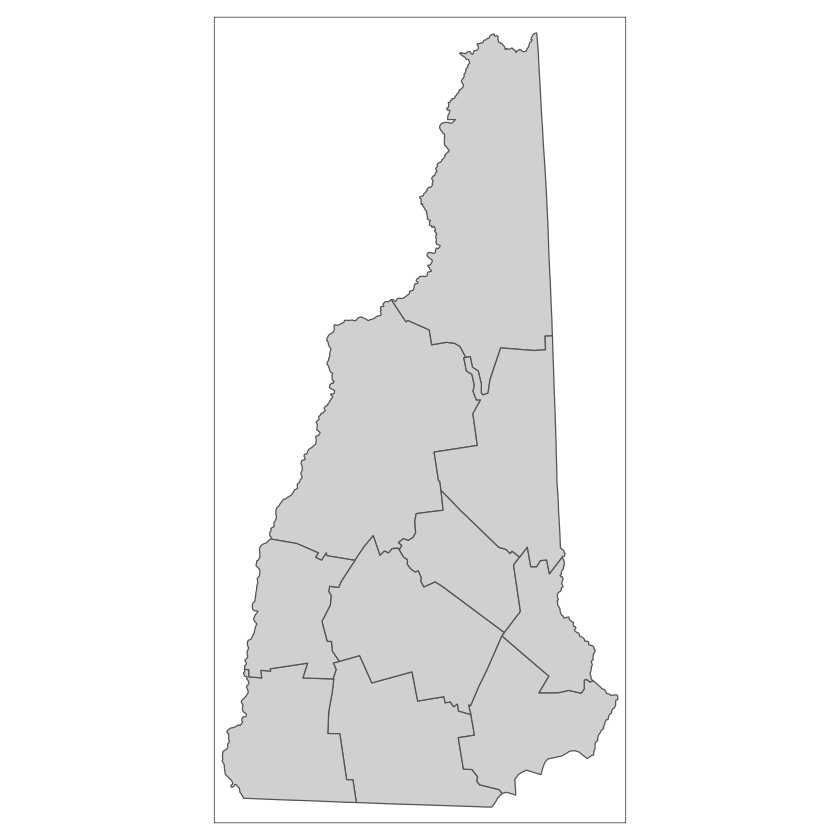

In [7]:
# tmap test plot of the New Hampshire data
qtm(nhgeo)

In [8]:
# Check if county names are in the same format in both files
str(nhgeo$NAME)
str(nhdata$County)

 Factor w/ 1921 levels "A\xf1asco","Abbeville",..: 684 791 416 138 1470 334 1653 1131 282 1657
 chr [1:10] "Belknap" "Carroll" "Cheshire" "Coos" "Grafton" "Hillsborough" ...


In [9]:
# They're not. Change the county names to plain characters in nhgeo:
nhgeo$NAME <- as.character(nhgeo$NAME)
str(nhgeo$NAME)

 chr [1:10] "Grafton" "Hillsborough" "Coos" "Belknap" "Rockingham" ...


In [10]:
# Order each data set by county name
nhgeo <- nhgeo[order(nhgeo$NAME),]
nhdata <- nhdata[order(nhdata$County),]

# Are the two county columns identical now? They should be:
identical(nhgeo$NAME,nhdata$County )

[1] TRUE

In [11]:
# Merge data with tmaptool's append_data function
nhmap <- append_data(nhgeo, nhdata, key.shp = "NAME", key.data="County")

# See the new data structure with
str(nhmap)

Warning message:
“This function is deprecated and has been migrated to github.com/mtennekes/oldtmaptools”
Keys match perfectly.




Classes ‘sf’ and 'data.frame':	10 obs. of  16 variables:
 $ STATEFP                : Factor w/ 56 levels "01","02","04",..: 30 30 30 30 30 30 30 30 30 30
 $ COUNTYFP               : Factor w/ 328 levels "001","003","005",..: 1 2 3 5 6 8 10 12 14 15
 $ COUNTYNS               : Factor w/ 3233 levels "00023901","00025441",..: 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505
 $ AFFGEOID               : Factor w/ 3233 levels "0500000US01001",..: 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774
 $ GEOID                  : Factor w/ 3233 levels "01001","01003",..: 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774
 $ NAME                   : chr  "Belknap" "Carroll" "Cheshire" "Coos" ...
 $ LSAD                   : Factor w/ 11 levels "00","03","04",..: 5 5 5 5 5 5 5 5 5 5
 $ ALAND                  : Factor w/ 3233 levels "1000508842","1001064387",..: 67 1991 1424 2526 2494 1831 1997 1382 3172 730
 $ AWATER                 : Factor w/ 3233 levels "0","10017640",..: 778 638 2460 3097 55 1942 

##Creating a static map

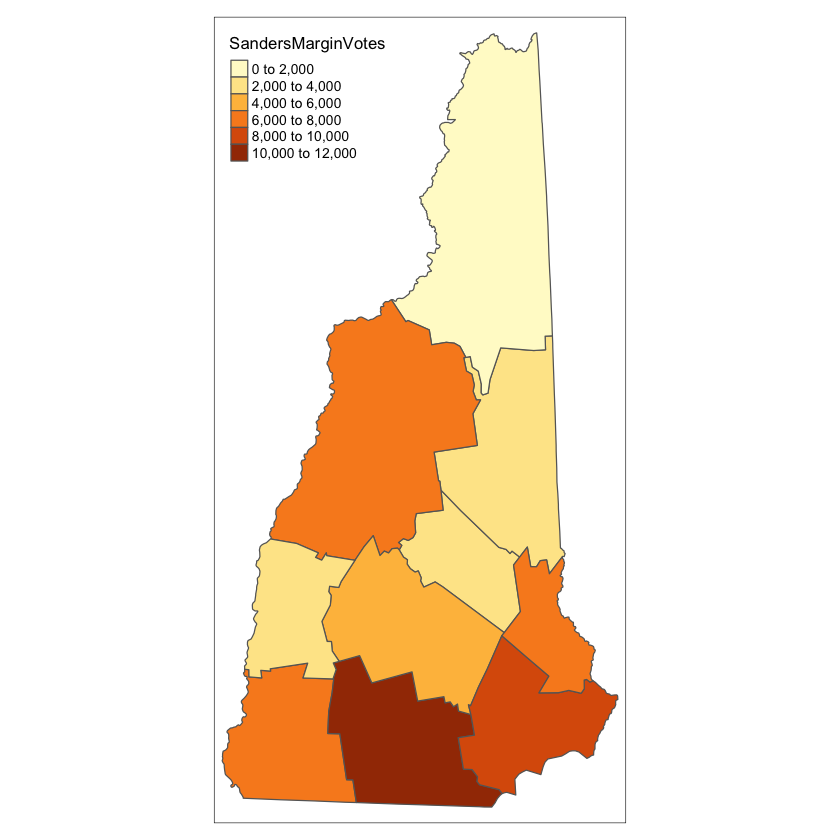

In [12]:
# Quick and easy maps as static images with tmap's qtm() function:
qtm(nhmap, "SandersMarginVotes")

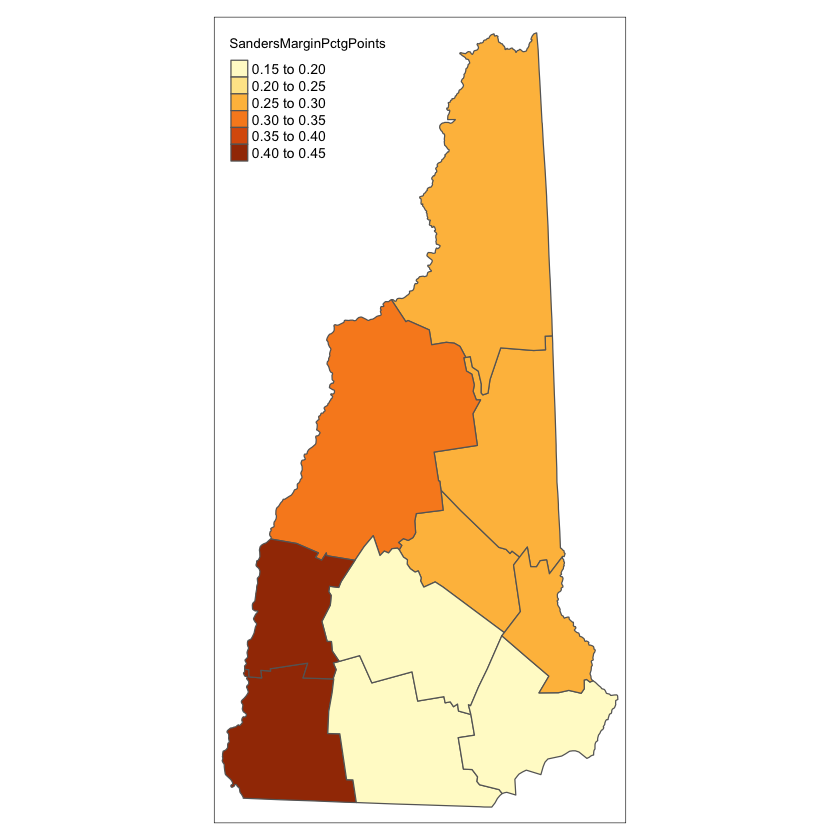

In [13]:
qtm(nhmap, "SandersMarginPctgPoints")

In [14]:
str(nhmap)

Classes ‘sf’ and 'data.frame':	10 obs. of  16 variables:
 $ STATEFP                : Factor w/ 56 levels "01","02","04",..: 30 30 30 30 30 30 30 30 30 30
 $ COUNTYFP               : Factor w/ 328 levels "001","003","005",..: 1 2 3 5 6 8 10 12 14 15
 $ COUNTYNS               : Factor w/ 3233 levels "00023901","00025441",..: 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505
 $ AFFGEOID               : Factor w/ 3233 levels "0500000US01001",..: 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774
 $ GEOID                  : Factor w/ 3233 levels "01001","01003",..: 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774
 $ NAME                   : chr  "Belknap" "Carroll" "Cheshire" "Coos" ...
 $ LSAD                   : Factor w/ 11 levels "00","03","04",..: 5 5 5 5 5 5 5 5 5 5
 $ ALAND                  : Factor w/ 3233 levels "1000508842","1001064387",..: 67 1991 1424 2526 2494 1831 1997 1382 3172 730
 $ AWATER                 : Factor w/ 3233 levels "0","10017640",..: 778 638 2460 3097 55 1942 

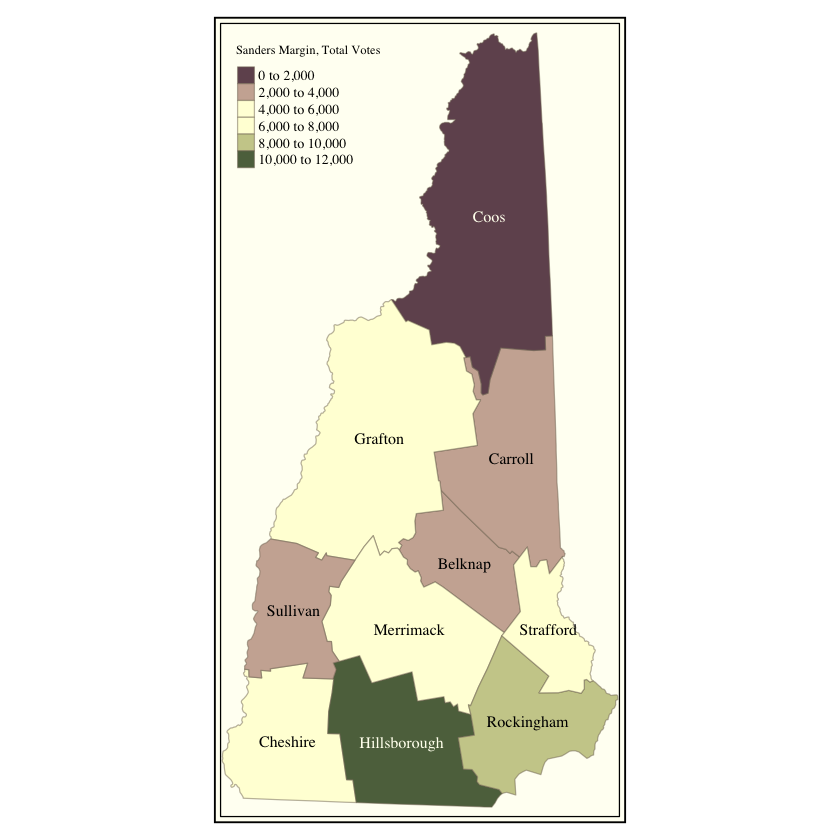

In [15]:
# For more control over look and feel, use the tm_shape() function:
nhstaticmap <-tm_shape(nhmap) +
  tm_fill("SandersMarginVotes", title="Sanders Margin, Total Votes", palette = "PRGn")+
  tm_borders(alpha=.5) +
  tm_text("NAME",size=0.8) +
  tm_style("classic")
nhstaticmap

Map saved to /Users/patricia.obyrne/Dropbox/TUDublin/pobyrne/contents/Visualising Data/R/Plots/nhdemprimary.jpg

Resolution: 1501.336 by 2937.385 pixels

Size: 5.004452 by 9.791282 inches (300 dpi)



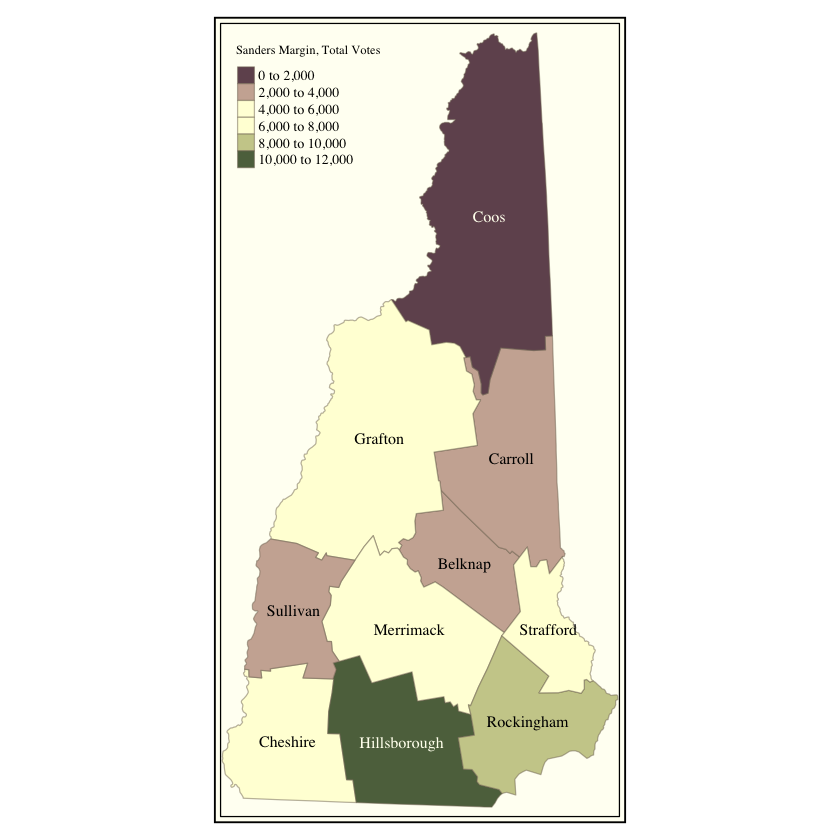

In [16]:
nhstaticmap

# save the map to a jpg file:
tmap_save(nhstaticmap, filename="./Plots/nhdemprimary.jpg")

## Creating an interactive map

#### Step 6: Create palette and pop-ups for interactive map
The next map we'll create will let users click to see underlying data as well as switch between maps, thanks to RStudio's Leaflet package that gives an R front-end to the open-source JavaScript Leaflet mapping library.

For a Leaflet map, there are two extra things we'll want to create in addition to the data we already have: 
 - a color palette and 
 - pop-up window contents.

For palette, we specify the data range we're mapping and what kind of color palette we want — both the particular colors and the type of color scale. 

There are four built-in types:

 - colorNumeric is for a continuous range of colors from low to high, so you might go from a very pale blue all the way to a deep dark blue, with many gradations in between.
 - colorBin maps a set of numerical data to a set of discrete bins, either defined by exact breaks or specific number of bins — things like "low," "medium" and "high".
 - colorQuantile maps numerical data into groups where each group (quantile) has the same number of records — often used for income levels, such as bottom 20%, next-lowest 20% and so on.
 - colorFactor is for non-numerical categories where no numerical value makes sense, such as countries in Europe that are part of the Eurozone and those that aren't.

Create a Leaflet palette with this syntax:

In [34]:
library(Leaflet)

ERROR: Error in library(Leaflet): there is no package called ‘Leaflet’


In [39]:
# Next up: Code for a basic interactive map, this time for Clinton percentages in NH

# Create a palette
clintonPalette <- colorNumeric(palette = "Blues", domain=nhmap$ClintonPct)

In [40]:
# and a pop-up window
library(scales)
nhpopup <- paste0("<b>County: ", 
                  nhmap$NAME, 
                  "</b><br />Sanders ", 
                  percent(nhmap$SandersPct), " - Clinton ", 
                  percent(nhmap$ClintonPct))

In [41]:
# Rename the county column from NAME to County with dplyr's rename function:

In [42]:
#nhmap <- rename(nhmap, County = NAME)


# Now the interactive map:
leaflet(nhmap) %>%
  addProviderTiles("CartoDB.Positron") %>%
  addPolygons(stroke=FALSE, 
              smoothFactor = 0.2, 
              fillOpacity = .8, 
              popup=nhpopup, 
              color= ~clintonPalette(nhmap$ClintonPct)
              )
  

Warning message:
“sf layer has inconsistent datum (+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs).
Need '+proj=longlat +datum=WGS84'”


HTML widgets cannot be represented in plain text (need html)

In [43]:
# re-project
nhmap_projected <- sf::st_transform(nhmap, "+proj=longlat +datum=WGS84")
leaflet(nhmap_projected) %>%
  addProviderTiles("CartoDB.Positron") %>%
  addPolygons(stroke=FALSE, 
              smoothFactor = 0.2, 
              fillOpacity = .8, 
              popup=nhpopup, 
              color= ~clintonPalette(nhmap$ClintonPct)
  )

HTML widgets cannot be represented in plain text (need html)

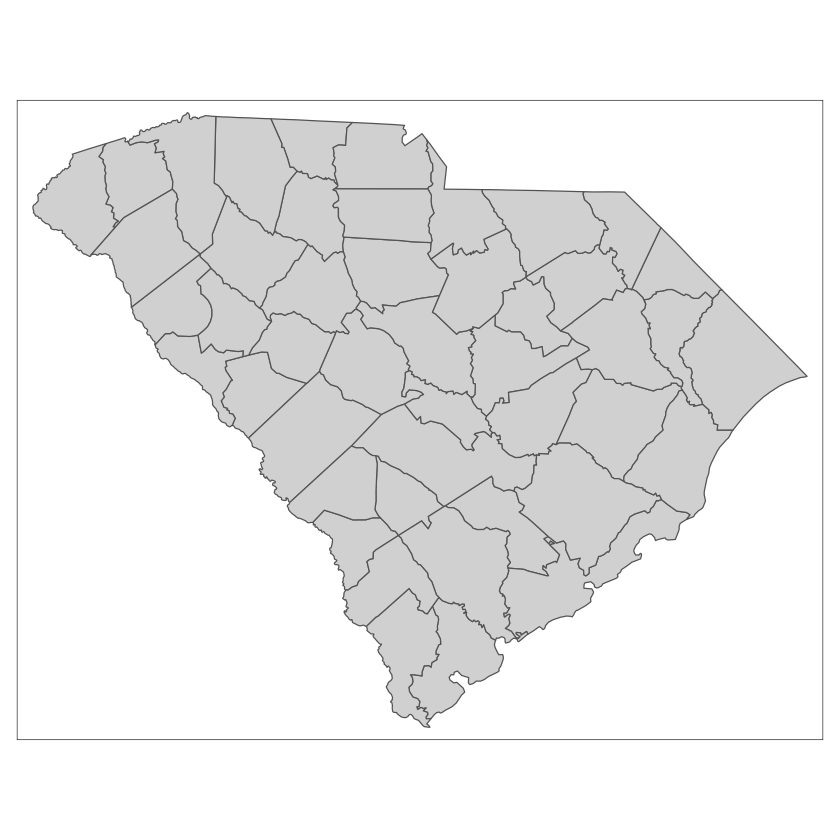

In [44]:
# South Carolina data
scdata <- rio::import(scdatafile)

# South Carolina shapefile:
scgeo <- dplyr::filter(usgeo, STATEFP==scfipscode)

# Quick plot of scgeo SC geospatial object:
qtm(scgeo)

In [23]:
# Add a column with percent of votes for each candidate. Candidates are in columns 2-7:
candidates <- colnames(scdata[2:7])
for(i in 2:7){
  j = i + 7
  temp <- scdata[[i]] / scdata$Total
  scdata[[j]] <- temp
  colnames(scdata)[j] <- paste0(colnames(scdata)[i], "Pct")
}  
  
# Get winner in each precinct
for(i in 1:nrow(scdata)){
  scdata$winner[i] <- names(which.max(scdata[i,2:7]))
}

# Import spreadsheet with percent of adult population holding at least a 4-yr college degree
sced <- rio::import("./Data/SCdegree.xlsx")


# Check if county names are in the same format in both files
str(scgeo$NAME)
str(scdata$County)

# Change the county names to plain characters in scgeo:
scgeo$NAME <- as.character(scgeo$NAME)

# Order each data set by county name
scgeo <- scgeo[order(scgeo$NAME),]
scdata <- scdata[order(scdata$County),]

# Are the two county columns identical now? They should be:
identical(scgeo$NAME,scdata$County )

 Factor w/ 1921 levels "A\xf1asco","Abbeville",..: 554 995 810 36 1073 523 1662 359 100 331 ...
 chr [1:46] "Abbeville" "Aiken" "Allendale" "Anderson" "Bamberg" "Barnwell" ...


[1] TRUE

In [24]:
# Add the election results and rename county column
scmap <- append_data(scgeo, scdata, key.data = "County", key.shp = "NAME")

Warning message:
“This function is deprecated and has been migrated to github.com/mtennekes/oldtmaptools”
Keys match perfectly.




In [25]:
scmap <- rename(scmap, County = NAME)
scmap <- append_data(scmap, sced, key.shp = "County", key.data = "County")

Warning message:
“This function is deprecated and has been migrated to github.com/mtennekes/oldtmaptools”
Keys match perfectly.




In [45]:
# Instead of just coloring the winner, let's color by strength of win with multiple layers
# Use same intensity for all - get minimum and maximum for the top 3 combined
minpct <- min(c(scmap$Donald.J.TrumpPct, scmap$Marco.RubioPct , scmap$Ted.CruzPct))
maxpct <- max(c(scmap$Donald.J.TrumpPct, scmap$Marco.RubioPct , scmap$Ted.CruzPct))

# Create leaflet palettes for each layer of the map:
winnerPalette <- colorFactor(palette=c("#984ea3", "#e41a1c"), domain = scmap$winner)
trumpPalette <- colorNumeric(palette = "Purples", domain=c(minpct, maxpct))
rubioPalette <- colorNumeric(palette = "Reds", domain = c(minpct, maxpct))
cruzPalette <- colorNumeric(palette = "Oranges", domain = c(minpct, maxpct))
edPalette <- colorNumeric(palette = "Blues", domain=scmap$PctCollegeDegree)

# Create a pop-up:
scpopup <- paste0("<b>County: ", scmap$County, "<br />Winner: ", scmap$winner, "</b><br /><br />Trump: ", percent(scmap$Donald.J.TrumpPct), "<br />Rubio: ", percent(scmap$Marco.RubioPct), "<br />Cruz: ", percent(scmap$Ted.CruzPct), "<br /><br />Pct w college ed: ", scmap$PctCollegeDegree, "% vs state-wide avg of 25%")

# Add the projection we know from the NH map we'll need for this data on a Leaflet map:
scmap <- sf::st_transform(scmap, "+proj=longlat +datum=WGS84")

  - leaflet(nhmap) creates a leaflet map object and sets nhmap as the data source. 
  - addProviderTiles("CartoDB.Positron" ) sets the background map tiles to CartoDB's  Positron design. 
  - The addPolygons() function puts the county shapes on the map and coloring them accordingly. 
    - stroke=FALSE says no border around the counties, 
    - fillOpacity sets the opacity of the colors,
    - popup sets the contents of the popup window and 
    - color sets the palette 

### Add palettes for a multi-layer map

Let's look at the GOP results in South Carolina among the top three candidates. I won't go over the data wrangling on this, except to say that I downloaded results from the South Carolina State Election Commission as well as Census Bureau data for education levels by county. If you download the project files, you'll see the initial data as well as the R code I used to add candidate vote percentages and join all that data to the South Carolina shapefile. That creates a geospatial object scmap to map.

There's so much data for a multi-candidate race that it's a little more complicated to choose what to color beyond "who won." I decided to go with one map layer to show the winner in each county, one layer each for the top three candidates (Trump, Rubio and Cruz) and a final layer showing percent of adult population with at least a bachelor's degree. (Why education level? Some news reports out of South Carolina said that seemed to correlate with levels of Trump's support; mapping that could help show if there's a pattern.)

In making my color palettes, I decided to use the same numerical scale for all three candidates. If I scaled color intensity for each candidate's minimum and maximum, a candidate with 10% to 18% would have a map with the same color intensities as one who had 45% to 52% — giving a wrong impression of the losing candidate's strength. So, first I calculated the minimum and maximum for the combined Trump/Rubio/Cruz county results:

In [52]:
# calculated the minimum and maximum for the combined Trump/Rubio/Cruz county results:

minpct <- min(c(scmap$Donald.J.TrumpPct, scmap$Marco.RubioPct , scmap$Ted.CruzPct))
maxpct <- max(c(scmap$Donald.J.TrumpPct, scmap$Marco.RubioPct , scmap$Ted.CruzPct))
#Now I can create a palette for each candidate using different colors but the same intensity range.

trumpPalette <- colorNumeric(palette = "Purples", domain=c(minpct, maxpct))
rubioPalette <- colorNumeric(palette = "Reds", domain = c(minpct, maxpct))
cruzPalette <- colorNumeric(palette = "Oranges", domain = c(minpct, maxpct))

#I'll also add palettes for the winner and education layers:

In [53]:
winnerPalette <- colorFactor(palette=c("#984ea3", "#e41a1c"), domain = scmap$winner)
edPalette <- colorNumeric(palette = "Blues", domain=scmap$PctCollegeDegree)

#Finally, I'll create a basic pop-up showing the county name, who won, the percentage for each candidate and percent of population with a college degree:



In [54]:
scpopup <- paste0("County: ", scmap@data$County,
"Winner: ", scmap@data$winner,
"Trump: ", percent(scmap$Donald.J.TrumpPct),
"Rubio: ", percent(scmap$Marco.RubioPct),
"Cruz: ", percent(scmap$Ted.CruzPct),
"Pct w college ed: ", 
                  scmap$PctCollegeDegree, "% vs state-wide avg of 25%")

ERROR: Error in paste0("County: ", scmap@data$County, "Winner: ", scmap@data$winner, : trying to get slot "data" from an object (class "sf") that is not an S4 object 


In [51]:
#Finally, before mapping, I know that I'm going to need to add the same projection that I needed for the New Hampshire map. 
#This code will add that projection to the scmap object:

scmap <- sf::st_transform(scmap, "+proj=longlat +datum=WGS84")

#This code shows a basic map of winners by county. Note that because only Trump and Rubio won counties in South Carolina, we can set up the legend to show only their colors and names:

In [28]:
# Put top 3 candidates in their own layers and add education layer, store in scGOPmap2 variable

scGOPmap2 <- leaflet(scmap) %>%
  addProviderTiles("CartoDB.Positron") %>%
  addPolygons(stroke=TRUE,
              weight=1,
              smoothFactor = 0.2, 
              fillOpacity = .75, 
              popup=scpopup, 
              color= ~winnerPalette(scmap$winner),
              group="Winners"
  ) %>% 
  addLegend(position="bottomleft", colors=c("#984ea3", "#e41a1c"), labels=c("Trump", "Rubio"))   %>%
  
  addPolygons(stroke=TRUE,
              weight=1,
              smoothFactor = 0.2, 
              fillOpacity = .75, 
              popup=scpopup, 
              color= ~trumpPalette(scmap$Donald.J.TrumpPct),
              group="Trump"
  ) %>%
  
  addPolygons(stroke=TRUE,
              weight=1,
              smoothFactor = 0.2, 
              fillOpacity = .75, 
              popup=scpopup, 
              color= ~rubioPalette(scmap$Marco.RubioPct),
              group="Rubio"
  ) %>%
  
  addPolygons(stroke=TRUE,
              weight=1,
              smoothFactor = 0.2, 
              fillOpacity = .75, 
              popup=scpopup, 
              color= ~cruzPalette(scmap$Ted.CruzPct),
              group="Cruz"
  ) %>%
  
  addPolygons(stroke=TRUE,
              weight=1,
              smoothFactor = 0.2, 
              fillOpacity = .75, 
              popup=scpopup, 
              color= ~edPalette(scmap$PctCollegeDegree),
              group="College degs"
  ) %>%
  
  addLayersControl(
    baseGroups=c("Winners", "Trump", "Rubio", "Cruz", "College degs"),
    position = "bottomleft",
    options = layersControlOptions(collapsed = FALSE)
  ) %>%
  addSearchOSM()

# View the scGOPmap2 map:
print(scGOPmap2)

In [29]:
# save as a self-contained HTML file
htmlwidgets::saveWidget(scGOPmap2, file="scGOPwidget2.html")

# save as an HTML file with dependencies in another directory:
htmlwidgets::saveWidget(widget=scGOPmap2, file="scGOPprimary_withdependencies.html", selfcontained=FALSE, libdir = "js")